In [1]:
#setting up the dependencies
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import numpy as np
import requests
import time
import hvplot.pandas
import requests
from scipy.stats import linregress
from datetime import datetime
import re
#locating the file
car_sales_to_load= Path('car_prices.csv')

#reading in to pandas
car_sales_data = pd.read_csv(car_sales_to_load, encoding="ISO-8859-1")

car_sales_data.head()


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [2]:
car_sales_data.count()

year            558837
make            548536
model           548438
trim            548186
body            545642
transmission    493485
vin             558833
state           558837
condition       547017
odometer        558743
color           558088
interior        558088
seller          558837
mmr             558799
sellingprice    558825
saledate        558825
dtype: int64

In [3]:
car_sales_data_df = car_sales_data.dropna(how='any')
car_sales_data_df.count()

year            472325
make            472325
model           472325
trim            472325
body            472325
transmission    472325
vin             472325
state           472325
condition       472325
odometer        472325
color           472325
interior        472325
seller          472325
mmr             472325
sellingprice    472325
saledate        472325
dtype: int64

In [40]:
make_value_count = car_sales_data['make'].value_counts()

make_value_count.head(5)


make
Ford         81013
Chevrolet    54150
Nissan       44043
Toyota       35313
Dodge        27181
Name: count, dtype: int64

In [5]:
make_value_count.tail(10)

make
Aston Martin    24
Tesla           23
Ferrari         17
Rolls-Royce     16
Plymouth        16
Geo             16
Fisker           9
Lamborghini      3
Daewoo           2
Lotus            1
Name: count, dtype: int64

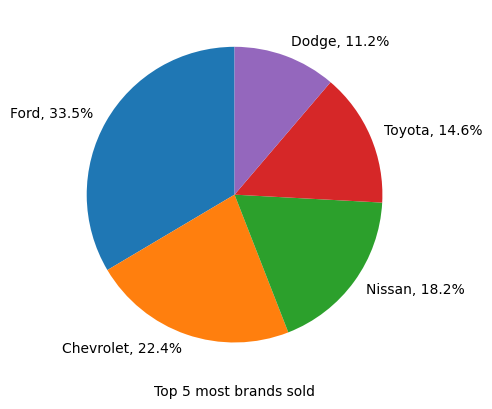

In [6]:
# Assuming car_sales_data_df is your DataFrame and it's already loaded

# Count occurrences
by_make = car_sales_data_df['make'].value_counts()

# Filtering to sales more than 10000
filtered_by_make = by_make[by_make > 25000]

# Calculate percentages
filtered_by_make_percent = filtered_by_make / filtered_by_make.sum() * 100

# Define a threshold for the least percent to display, e.g., 1%
threshold_percent = 1

# Filter out those below the threshold
filtered_by_make_percent = filtered_by_make_percent[filtered_by_make_percent > threshold_percent]

# Plotting the pie chart
fig, ax = plt.subplots()
filtered_by_make_percent.plot(kind='pie', labels=['%s, %1.1f%%' % (label, value) for label, value in filtered_by_make_percent.items()], startangle=90,  ax=ax)
ax.set_ylabel('')  # Removes the y-label as it's unnecessary for a pie chart
plt.xlabel('Top 5 most brands sold')

plt.savefig('Top 5 most brands sold.png', dpi=300)  # Adjust the path and DPI as needed


plt.show()

In [ ]:
Summary: 

Ford's Market Share: Ford stands out distinctly, commanding a significant 33.5% of total sales among the top 5 brands, showcasing their dominance in the market.
Competitive Edge: This substantial market share not only highlights Ford's popularity but also suggests a successful business strategy that resonates with a large customer base.

Chasing the Leader: Chevrolet and Nissan hold substantial portions of the market at 22.4% and 18.2% respectively, positioning them as strong contenders within the automotive industry.
Steady Performers: Toyota and Dodge maintain a steady presence in the market with 14.6% and 11.2% of sales, indicating consistent performance and customer loyalty in a competitive landscape.

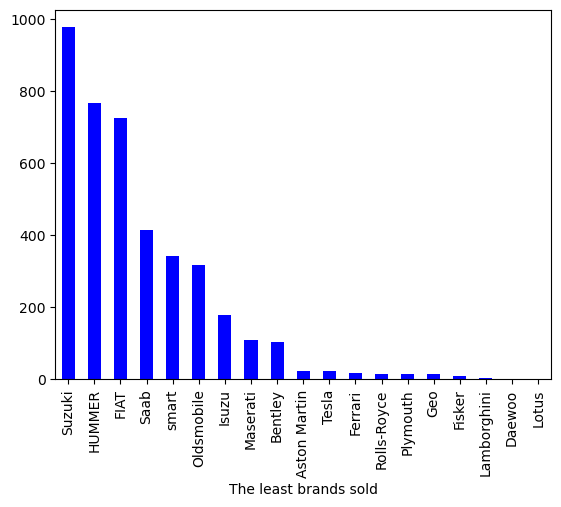

In [7]:
#now we need the cars that were sold less than 1000

#as we haver before the value counts of each car we need to filter those with less than 1000
filter_less_5000 = by_make[by_make < 1000]

#plot the bar chart 

filter_less_5000.plot(kind ='bar', align = 'center', color = 'b')

plt.xlabel('The least brands sold')

plt.savefig('The least brands sold.png')  # Adjust the path and DPI as needed




In [ ]:
Summary: 

Suzuki Leads the Pack: Among the least sold brands, Suzuki tops the chart, indicating a relatively stronger performance in a segment where other brands like Oldsmobile, Saab, and Smart trail behind with lower sales numbers.

Exclusive Brands Remain Niche: High-end manufacturers such as Aston Martin, Ferrari, and Lamborghini report low sales volumes, reflective of their market's exclusivity and niche target audience compared to mass-market brands.

In [39]:
# Calculate summary statistics
summary_stats = by_make.describe()
print("Summary Statistics for Car Sales by make:")
print(summary_stats)

Summary Statistics for Car Sales by make:
count       53.000000
mean      8911.792453
std      15255.227168
min          1.000000
25%        318.000000
50%       3082.000000
75%      10780.000000
max      81013.000000
Name: count, dtype: float64
